In [271]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [272]:
df = pd.read_csv("Datasets/Medicalpremium.csv")

In [273]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [274]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [275]:
df.isnull().values.any()

False

In [276]:
 df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [277]:
df.drop(['KnownAllergies','HistoryOfCancerInFamily'] , axis='columns', inplace=True)

In [278]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,25000
1,60,1,0,0,0,180,73,0,29000
2,36,1,1,0,0,158,59,1,23000
3,52,1,1,0,1,183,93,2,28000
4,38,0,0,0,1,166,88,1,23000


In [279]:
df.rename(columns = {'BloodPressureProblems': 'BloodP', 'AnyTransplants': 'Transplants',
                     'AnyChronicDiseases':'ChronicDiseases',
                     'NumberOfMajorSurgeries':'MajorSurgeries','PremiumPrice':'Price'}, inplace = True)

In [280]:
df.head()

,Age,Diabetes,BloodP,Transplants,ChronicDiseases,Height,Weight,MajorSurgeries,Price
0,45,0,0,0,0,155,57,0,25000
1,60,1,0,0,0,180,73,0,29000
2,36,1,1,0,0,158,59,1,23000
3,52,1,1,0,1,183,93,2,28000
4,38,0,0,0,1,166,88,1,23000


In [281]:
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in df.columns:
    df[col] = absolute_maximum_scale(df[col])


In [282]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[["Age", "Height", "Weight"]] = scaler.fit_transform(df[["Age", "Height", "Weight"]])
# df.head()

In [283]:
X = df.drop('Price', axis='columns')
X.head()

,Age,Diabetes,BloodP,Transplants,ChronicDiseases,Height,Weight,MajorSurgeries
0,0.681818,0.0,0.0,0.0,0.0,0.824468,0.431818,0.000000
1,0.909091,1.0,0.0,0.0,0.0,0.957447,0.553030,0.000000
2,0.545455,1.0,1.0,0.0,0.0,0.840426,0.446970,0.333333
3,0.787879,1.0,1.0,0.0,1.0,0.973404,0.704545,0.666667
4,0.575758,0.0,0.0,0.0,1.0,0.882979,0.666667,0.333333


In [284]:
Y =df['Price']
Y.head()

0    0.625
1    0.725
2    0.575
3    0.700
4    0.575
Name: Price, dtype: float64

In [285]:
table = pd.pivot_table(data=df,index='Age',values='Price',aggfunc=np.sum)


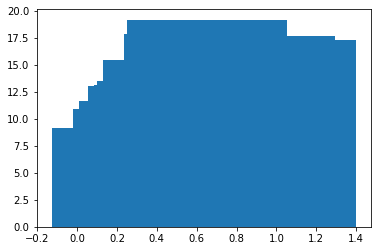

In [286]:
plt.bar(table.index,table['Price'])
plt.show()

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [288]:
X_train.head(10)

,Age,Diabetes,BloodP,Transplants,ChronicDiseases,Height,Weight,MajorSurgeries
398,1.000000,1.0,1.0,0.0,0.0,0.867021,0.530303,0.666667
523,0.530303,0.0,1.0,0.0,0.0,0.898936,0.651515,0.000000
809,0.727273,0.0,0.0,0.0,1.0,0.856383,0.719697,0.333333
501,0.393939,0.0,0.0,0.0,1.0,0.978723,0.553030,0.333333
430,0.878788,1.0,1.0,0.0,0.0,0.845745,0.469697,0.000000
984,0.712121,1.0,1.0,0.0,0.0,0.840426,0.553030,0.333333
228,0.333333,1.0,1.0,0.0,0.0,0.882979,0.924242,0.000000
764,0.272727,1.0,1.0,0.0,0.0,0.898936,0.742424,0.000000
877,0.348485,0.0,0.0,0.0,0.0,0.787234,0.522727,0.000000
212,0.909091,1.0,0.0,0.0,0.0,0.930851,0.742424,0.000000


In [289]:
X_test.head(10)

,Age,Diabetes,BloodP,Transplants,ChronicDiseases,Height,Weight,MajorSurgeries
613,0.757576,0.0,0.0,0.0,0.0,0.877660,0.636364,0.333333
451,0.590909,0.0,0.0,0.0,1.0,0.984043,0.553030,0.333333
731,0.984848,1.0,1.0,0.0,0.0,0.877660,0.659091,0.000000
436,0.439394,0.0,0.0,0.0,0.0,0.952128,0.530303,0.333333
275,0.727273,1.0,1.0,0.0,0.0,0.909574,0.636364,0.000000
582,0.757576,0.0,0.0,0.0,0.0,0.984043,0.590909,0.333333
707,0.712121,0.0,1.0,0.0,0.0,0.930851,0.431818,0.000000
299,0.530303,0.0,1.0,0.0,0.0,0.893617,0.659091,0.000000
718,0.833333,1.0,1.0,0.0,0.0,0.898936,0.553030,0.666667
494,0.969697,1.0,1.0,0.0,0.0,0.946809,0.469697,0.666667


In [290]:
y_train.head()

398    0.700
523    0.575
809    0.875
501    0.475
430    0.625
Name: Price, dtype: float64

In [291]:
model = LinearRegression()

In [292]:
model.fit(X_train,y_train)

LinearRegression()

In [293]:
y_pred=model.predict(X_test)

In [294]:
model.coef_

array([ 0.52243434, -0.00927919, -0.0009617 ,  0.16419841,  0.06534962,
       -0.02360667,  0.20763809, -0.02966623])

In [295]:
model.intercept_

0.16510958545515253

In [296]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [297]:
model.score(X_test, y_test)


0.6826349595518137